In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import neighbors, tree, naive_bayes
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn import model_selection
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
missing_values = ["n/a", "na", "--", "?"]
adult_df = pd.read_csv('/Users/appobs/Desktop/hw/478/week4/hw2/adult-modified.csv', delimiter = ',', sep='\t', na_values = missing_values)
adult_df.head(10)

age workclass  education marital-status   race     sex  hours-per-week  \
0  39.0    Public         13         Single  White    Male              40   
1  50.0  Self-emp         13        Married  White    Male              13   
2  38.0   Private          9         Single  White    Male              40   
3  53.0   Private          7        Married  Black    Male              40   
4  28.0   Private         13        Married  Black  Female              40   
5  37.0   Private         14        Married  White  Female              40   
6  49.0   Private          5        Married  Black  Female              16   
7  52.0  Self-emp          9        Married  White    Male              45   
8  31.0   Private         14         Single  White  Female              50   
9  42.0   Private         13        Married  White    Male              40   

  income  
0  <=50K  
1  <=50K  
2  <=50K  
3  <=50K  
4  <=50K  
5  <=50K  
6  <=50K  
7   >50K  
8   >50K  
9   >50K

In [3]:
adult_df.describe(include = 'all')

age workclass     education marital-status   race    sex  \
count   9802.000000      9412  10000.000000          10000  10000  10000   
unique          NaN         3           NaN              2      5      2   
top             NaN   Private           NaN         Single  White   Male   
freq            NaN      6947           NaN           5017   8556   6703   
mean      38.449806       NaN     10.076600            NaN    NaN    NaN   
std       13.611949       NaN      2.548172            NaN    NaN    NaN   
min       17.000000       NaN      1.000000            NaN    NaN    NaN   
25%       27.000000       NaN      9.000000            NaN    NaN    NaN   
50%       37.000000       NaN     10.000000            NaN    NaN    NaN   
75%       47.000000       NaN     12.000000            NaN    NaN    NaN   
max       90.000000       NaN     16.000000            NaN    NaN    NaN   

        hours-per-week income  
count     10000.000000  10000  
unique             NaN      2  
top                NaN  <=50K  
freq               NaN   7621  
mean         40.530300    NaN  
std          12.277197    NaN  
min           1.000000    NaN  
25%          40.000000    NaN  
50%          40.000000    NaN  
75%          45.000000    NaN  
max          99.000000    NaN

In [4]:
adult_df.columns.values

array(['age', 'workclass', 'education', 'marital-status', 'race', 'sex',
       'hours-per-week', 'income'], dtype=object)

In [5]:
adult_df.isnull()[0:20]

age  workclass  education  marital-status   race    sex  hours-per-week  \
0   False      False      False           False  False  False           False   
1   False      False      False           False  False  False           False   
2   False      False      False           False  False  False           False   
3   False      False      False           False  False  False           False   
4   False      False      False           False  False  False           False   
5   False      False      False           False  False  False           False   
6   False      False      False           False  False  False           False   
7   False      False      False           False  False  False           False   
8   False      False      False           False  False  False           False   
9   False      False      False           False  False  False           False   
10  False      False      False           False  False  False           False   
11  False      False      False           False  False  False           False   
12  False      False      False           False  False  False           False   
13  False      False      False           False  False  False           False   
14  False      False      False           False  False  False           False   
15  False      False      False           False  False  False           False   
16  False      False      False           False  False  False           False   
17  False      False      False           False  False  False           False   
18  False      False      False           False  False  False           False   
19   True      False      False           False  False  False           False   

    income  
0    False  
1    False  
2    False  
3    False  
4    False  
5    False  
6    False  
7    False  
8    False  
9    False  
10   False  
11   False  
12   False  
13   False  
14   False  
15   False  
16   False  
17   False  
18   False  
19   False

In [6]:
adult_df[adult_df.age.isnull()].head(10)

age workclass  education marital-status   race     sex  hours-per-week  \
19   NaN  Self-emp         14         Single  White  Female              45   
27   NaN       NaN         10        Married  Asian    Male              60   
40   NaN   Private          5        Married  White    Male              43   
65   NaN   Private          9        Married  White    Male              40   
80   NaN   Private          9         Single  White    Male              30   
89   NaN    Public         16         Single  White  Female              50   
95   NaN    Public         10         Single  White    Male              50   
113  NaN   Private         10        Married  White  Female              25   
132  NaN  Self-emp          9        Married  White    Male              35   
147  NaN   Private          9        Married  White  Female              24   

    income  
19    >50K  
27    >50K  
40   <=50K  
65   <=50K  
80   <=50K  
89    >50K  
95   <=50K  
113  <=50K  
132  <=50K  
147  <=50K

In [7]:
adult_df[adult_df.workclass.isnull()].head(10)

age workclass  education marital-status   race     sex  hours-per-week  \
27    NaN       NaN         10        Married  Asian    Male              60   
61   32.0       NaN          4        Married  White    Male              40   
69   25.0       NaN         10         Single  White    Male              40   
77   67.0       NaN          6        Married  White    Male               2   
106  17.0       NaN          6         Single  White  Female              32   
128  35.0       NaN          9        Married  White    Male              40   
149  43.0       NaN         10         Single  White  Female              40   
154  52.0       NaN          9         Single  White    Male              45   
160  68.0       NaN          2         Single  White  Female              20   
187  53.0       NaN         13         Single  White  Female              50   

    income  
27    >50K  
61   <=50K  
69   <=50K  
77   <=50K  
106  <=50K  
128  <=50K  
149  <=50K  
154   >50K  
160  <=50K  
187  <=50K

In [8]:
adult_df[adult_df.education.isnull()].head(10)

Empty DataFrame
Columns: [age, workclass, education, marital-status, race, sex, hours-per-week, income]
Index: []

In [9]:
# removing na values in columns
adult_df.dropna(subset = ['workclass', 'marital-status', 'race', 'sex', 'income'], inplace = True)
adult_df.head(30)

age workclass  education marital-status         race     sex  \
0   39.0    Public         13         Single        White    Male   
1   50.0  Self-emp         13        Married        White    Male   
2   38.0   Private          9         Single        White    Male   
3   53.0   Private          7        Married        Black    Male   
4   28.0   Private         13        Married        Black  Female   
5   37.0   Private         14        Married        White  Female   
6   49.0   Private          5        Married        Black  Female   
7   52.0  Self-emp          9        Married        White    Male   
8   31.0   Private         14         Single        White  Female   
9   42.0   Private         13        Married        White    Male   
10  37.0   Private         10        Married        Black    Male   
11  30.0    Public         13        Married        Asian    Male   
12  23.0   Private         13         Single        White  Female   
13  32.0   Private         12         Single        Black    Male   
14  40.0   Private         11        Married        Asian    Male   
15  34.0   Private          4        Married  Amer-Indian    Male   
16  25.0  Self-emp          9         Single        White    Male   
17  32.0   Private          9         Single        White    Male   
18  38.0   Private          7        Married        White    Male   
19   NaN  Self-emp         14         Single        White  Female   
20  40.0   Private         16        Married        White    Male   
21  54.0   Private          9         Single        Black  Female   
22  35.0    Public          5        Married        Black    Male   
23  43.0   Private          7        Married        White    Male   
24  59.0   Private          9         Single        White  Female   
25  56.0    Public         13        Married        White    Male   
26  19.0   Private          9         Single        White    Male   
28  39.0   Private          9         Single        White    Male   
29  49.0   Private          9        Married        White    Male   
30  23.0    Public         12         Single        White    Male   

    hours-per-week income  
0               40  <=50K  
1               13  <=50K  
2               40  <=50K  
3               40  <=50K  
4               40  <=50K  
5               40  <=50K  
6               16  <=50K  
7               45   >50K  
8               50   >50K  
9               40   >50K  
10              80   >50K  
11              40   >50K  
12              30  <=50K  
13              50  <=50K  
14              40   >50K  
15              45  <=50K  
16              35  <=50K  
17              40  <=50K  
18              50  <=50K  
19              45   >50K  
20              60   >50K  
21              20  <=50K  
22              40  <=50K  
23              40  <=50K  
24              40  <=50K  
25              40   >50K  
26              40  <=50K  
28              80  <=50K  
29              40  <=50K  
30              52  <=50K

In [10]:
#adult_df['age', 'education', 'hours-per-week'].fillna
mean = adult_df.select_dtypes(np.number).mean()
adult_df.fillna(mean, inplace=True)
adult_df.head(20)

age workclass  education marital-status         race     sex  \
0   39.000000    Public         13         Single        White    Male   
1   50.000000  Self-emp         13        Married        White    Male   
2   38.000000   Private          9         Single        White    Male   
3   53.000000   Private          7        Married        Black    Male   
4   28.000000   Private         13        Married        Black  Female   
5   37.000000   Private         14        Married        White  Female   
6   49.000000   Private          5        Married        Black  Female   
7   52.000000  Self-emp          9        Married        White    Male   
8   31.000000   Private         14         Single        White  Female   
9   42.000000   Private         13        Married        White    Male   
10  37.000000   Private         10        Married        Black    Male   
11  30.000000    Public         13        Married        Asian    Male   
12  23.000000   Private         13         Single        White  Female   
13  32.000000   Private         12         Single        Black    Male   
14  40.000000   Private         11        Married        Asian    Male   
15  34.000000   Private          4        Married  Amer-Indian    Male   
16  25.000000  Self-emp          9         Single        White    Male   
17  32.000000   Private          9         Single        White    Male   
18  38.000000   Private          7        Married        White    Male   
19  38.364632  Self-emp         14         Single        White  Female   

    hours-per-week income  
0               40  <=50K  
1               13  <=50K  
2               40  <=50K  
3               40  <=50K  
4               40  <=50K  
5               40  <=50K  
6               16  <=50K  
7               45   >50K  
8               50   >50K  
9               40   >50K  
10              80   >50K  
11              40   >50K  
12              30  <=50K  
13              50  <=50K  
14              40   >50K  
15              45  <=50K  
16              35  <=50K  
17              40  <=50K  
18              50  <=50K  
19              45   >50K

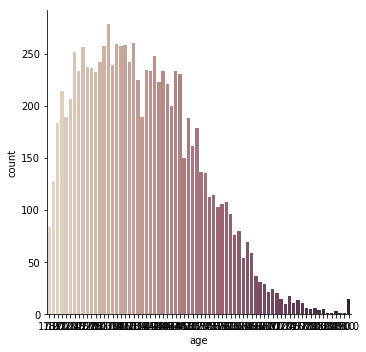

In [11]:
####Basic information
sns.catplot(x="age", kind="count", palette="ch:.25", data=adult_df);

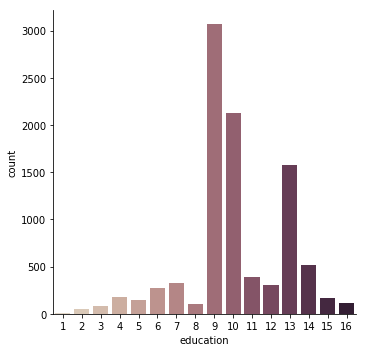

In [12]:
sns.catplot(x="education", kind="count", palette="ch:.25", data=adult_df);

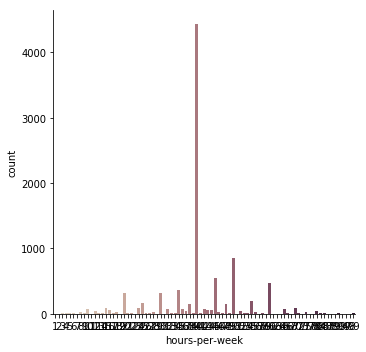

In [13]:
sns.catplot(x="hours-per-week", kind="count", palette="ch:.25", data=adult_df);

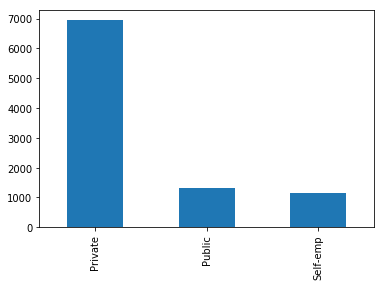

In [14]:
adult_df['workclass'].value_counts().plot(kind='bar')


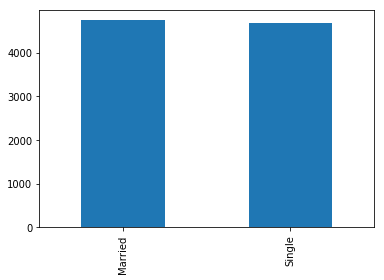

In [15]:
adult_df['marital-status'].value_counts().plot(kind='bar')

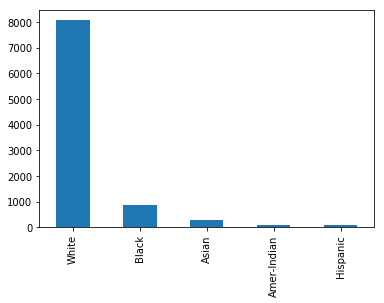

In [16]:
adult_df['race'].value_counts().plot(kind='bar')

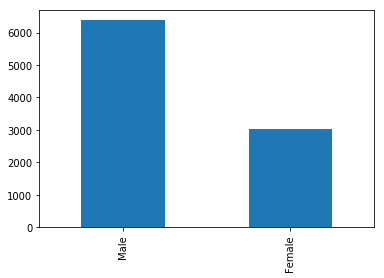

In [17]:
adult_df['sex'].value_counts().plot(kind='bar')

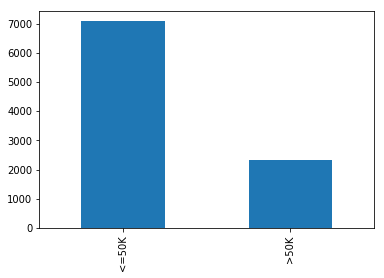

In [18]:
adult_df['income'].value_counts().plot(kind='bar')

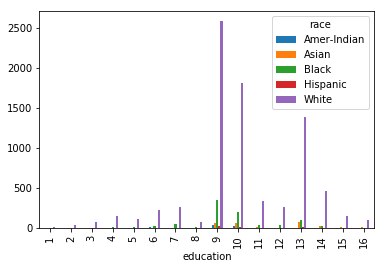

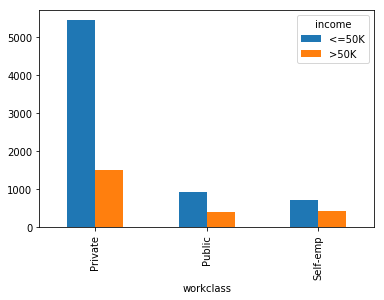

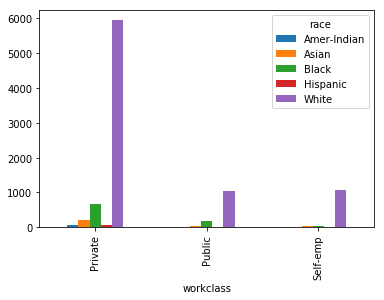

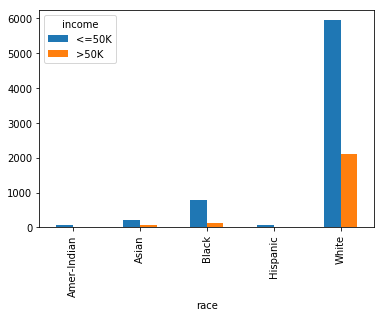

In [19]:
gg1 = pd.crosstab(adult_df["education"], adult_df["race"])
gg2 = pd.crosstab(adult_df["workclass"], adult_df["income"])
gg3 = pd.crosstab(adult_df["workclass"], adult_df["race"])
gg4 = pd.crosstab(adult_df["race"], adult_df["income"])



plt.show(gg1.plot(kind = 'bar'))
plt.show(gg2.plot(kind = 'bar'))
plt.show(gg3.plot(kind = 'bar'))
plt.show(gg4.plot(kind = 'bar'))


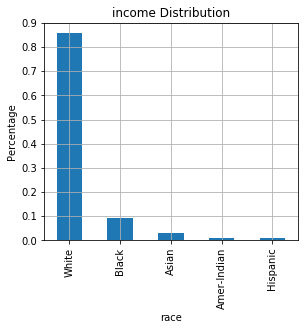

In [20]:
temp1 = adult_df["race"].value_counts()/adult_df["income"].count()

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('race')
ax1.set_ylabel('Percentage')
ax1.set_title("income Distribution")
temp1.plot(kind='bar', grid = True)

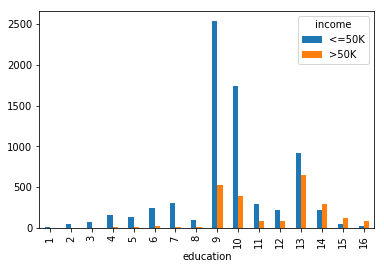

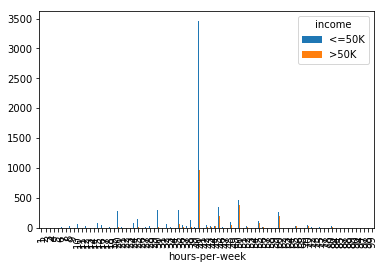

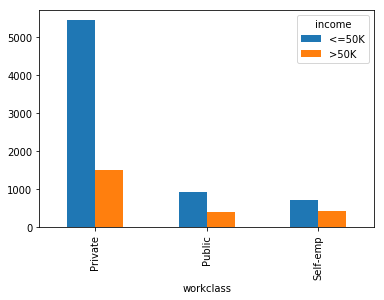

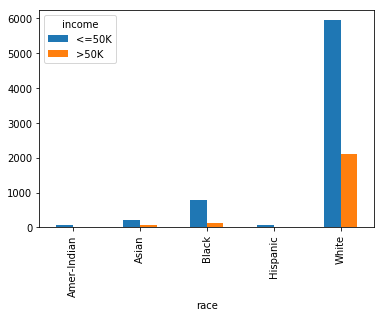

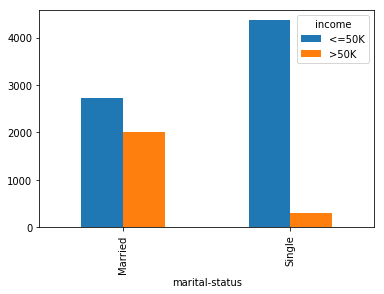

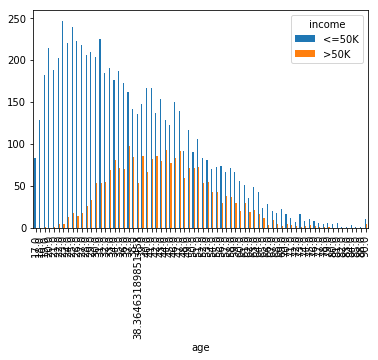

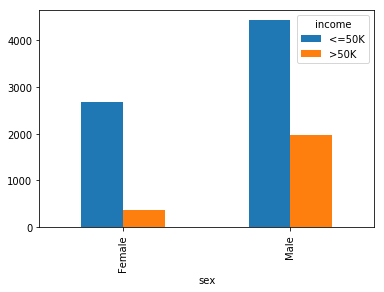

In [21]:
inc1 = pd.crosstab(adult_df["education"], adult_df["income"])
inc2 = pd.crosstab(adult_df["hours-per-week"], adult_df["income"])
inc3 = pd.crosstab(adult_df["workclass"], adult_df["income"])
inc4 = pd.crosstab(adult_df["race"], adult_df["income"])
inc5 = pd.crosstab(adult_df["marital-status"], adult_df["income"])
inc6 = pd.crosstab(adult_df["age"], adult_df["income"])
inc7 = pd.crosstab(adult_df["sex"], adult_df["income"])



plt.show(inc1.plot(kind = 'bar'))
plt.show(inc2.plot(kind = 'bar'))
plt.show(inc3.plot(kind = 'bar'))
plt.show(inc4.plot(kind = 'bar'))
plt.show(inc5.plot(kind = 'bar'))
plt.show(inc6.plot(kind = 'bar'))
plt.show(inc7.plot(kind = 'bar'))



In [22]:
adult_df.columns.values

array(['age', 'workclass', 'education', 'marital-status', 'race', 'sex',
       'hours-per-week', 'income'], dtype=object)

In [23]:
adult_dmy = pd.get_dummies(adult_df[['workclass','marital-status','race','sex','income']])
adult_dmy.head()

workclass_Private  workclass_Public  workclass_Self-emp  \
0                  0                 1                   0   
1                  0                 0                   1   
2                  1                 0                   0   
3                  1                 0                   0   
4                  1                 0                   0   

   marital-status_Married  marital-status_Single  race_Amer-Indian  \
0                       0                      1                 0   
1                       1                      0                 0   
2                       0                      1                 0   
3                       1                      0                 0   
4                       1                      0                 0   

   race_Asian  race_Black  race_Hispanic  race_White  sex_Female  sex_Male  \
0           0           0              0           1           0         1   
1           0           0              0           1           0         1   
2           0           0              0           1           0         1   
3           0           1              0           0           0         1   
4           0           1              0           0           1         0   

   income_<=50K  income_>50K  
0             1            0  
1             1            0  
2             1            0  
3             1            0  
4             1            0

In [24]:
adult_numeric = pd.concat([adult_df, adult_dmy], axis=1)
adult_numeric.head(10)
adult_numeric_names = adult_numeric.columns.values
adult_numeric_names

array(['age', 'workclass', 'education', 'marital-status', 'race', 'sex',
       'hours-per-week', 'income', 'workclass_Private',
       'workclass_Public', 'workclass_Self-emp', 'marital-status_Married',
       'marital-status_Single', 'race_Amer-Indian', 'race_Asian',
       'race_Black', 'race_Hispanic', 'race_White', 'sex_Female',
       'sex_Male', 'income_<=50K', 'income_>50K'], dtype=object)

In [25]:
adult_numeric = adult_numeric[['age', 'education',
       'hours-per-week', 'workclass_Private',
       'workclass_Public', 'workclass_Self-emp', 'marital-status_Married',
       'marital-status_Single', 'race_Amer-Indian', 'race_Asian',
       'race_Black', 'race_Hispanic', 'race_White', 'sex_Female',
       'sex_Male', 'income_>50K']]

adult_numeric.head(10)

age  education  hours-per-week  workclass_Private  workclass_Public  \
0  39.0         13              40                  0                 1   
1  50.0         13              13                  0                 0   
2  38.0          9              40                  1                 0   
3  53.0          7              40                  1                 0   
4  28.0         13              40                  1                 0   
5  37.0         14              40                  1                 0   
6  49.0          5              16                  1                 0   
7  52.0          9              45                  0                 0   
8  31.0         14              50                  1                 0   
9  42.0         13              40                  1                 0   

   workclass_Self-emp  marital-status_Married  marital-status_Single  \
0                   0                       0                      1   
1                   1                       1                      0   
2                   0                       0                      1   
3                   0                       1                      0   
4                   0                       1                      0   
5                   0                       1                      0   
6                   0                       1                      0   
7                   1                       1                      0   
8                   0                       0                      1   
9                   0                       1                      0   

   race_Amer-Indian  race_Asian  race_Black  race_Hispanic  race_White  \
0                 0           0           0              0           1   
1                 0           0           0              0           1   
2                 0           0           0              0           1   
3                 0           0           1              0           0   
4                 0           0           1              0           0   
5                 0           0           0              0           1   
6                 0           0           1              0           0   
7                 0           0           0              0           1   
8                 0           0           0              0           1   
9                 0           0           0              0           1   

   sex_Female  sex_Male  income_>50K  
0           0         1            0  
1           0         1            0  
2           0         1            0  
3           0         1            0  
4           1         0            0  
5           1         0            0  
6           1         0            0  
7           0         1            1  
8           1         0            1  
9           0         1            1

In [26]:
adult_target = adult_numeric['income_>50K']
adult_target.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: income_>50K, dtype: uint8

In [27]:
#### Model selection processing 
adult_train, adult_test, adult_target_train, adult_target_test = train_test_split(adult_numeric, adult_target, test_size=0.2, random_state=33)
print(adult_test)

            age  education  hours-per-week  workclass_Private  \
8419  56.000000         10              45                  1   
2629  54.000000          9              45                  1   
2523  52.000000         11              35                  1   
7143  42.000000         16              60                  0   
5902  30.000000          9              50                  0   
2737  58.000000          9              40                  1   
7700  33.000000          9              40                  1   
2217  45.000000         14              50                  1   
485   25.000000         10              20                  1   
5696  31.000000         10              56                  0   
1159  20.000000          9              28                  1   
3617  37.000000          9              56                  0   
8839  43.000000          5              40                  1   
2584  57.000000          2              40                  1   
3705  43.000000          

In [69]:
min_max_scaler = preprocessing.MinMaxScaler().fit(adult_train)
adult_train_norm = min_max_scaler.transform(adult_train)
adult_test_norm = min_max_scaler.transform(adult_test)



/Users/appobs/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [70]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
treeclf = treeclf.fit(adult_train_norm, adult_target_train)
cv_scores = model_selection.cross_val_score(treeclf, adult_train_norm, adult_target_train, cv=10)
cv_scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [71]:
print (treeclf.score(adult_test_norm, adult_target_test))

1.0


In [72]:
print (treeclf.score(adult_train_norm, adult_target_train))

1.0


In [73]:
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy on X-Val: 1.00 (+/- 0.00)


In [74]:
print ("Accuracy on Training: ",  treeclf.score(adult_train_norm, adult_target_train))

Accuracy on Training:  1.0


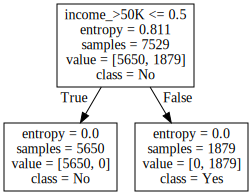

In [77]:
export_graphviz(treeclf,out_file='tree.dot', feature_names=adult_train.columns, class_names=["No","Yes"])

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

1.0
1.0
Overall Accuracy on X-Val: 1.00 (+/- 0.00)
Accuracy on Training:  1.0


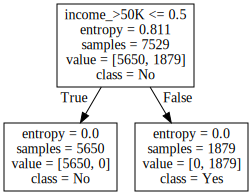

In [82]:
#### Naive Bayes

nbclf = naive_bayes.MultinomialNB()
nbclf = nbclf.fit(adult_train_norm, adult_target_train)
cv_scores = model_selection.cross_val_score(nbclf, adult_train_norm, adult_target_train, cv=10)
cv_scores

print (nbclf.score(adult_test_norm, adult_target_test))

print (nbclf.score(adult_train_norm, adult_target_train))

print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

print ("Accuracy on Training: ",  nbclf.score(adult_train_norm, adult_target_train))

export_graphviz(nbclf,out_file='tree.dot', feature_names=adult_train.columns, class_names=["No","Yes"])

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [90]:
#### LDA

In [97]:
ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(adult_train_norm, adult_target_train)
cv_scores = model_selection.cross_val_score(ldclf, adult_train_norm, adult_target_train, cv=10)
cv_scores

print (ldclf.score(adult_test_norm, adult_target_test))

print (ldclf.score(adult_train_norm, adult_target_train))

print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

print ("Accuracy on Training: ",  ldclf.score(adult_train_norm, adult_target_train))

export_graphviz(ldclf,out_file='tree.dot', feature_names=adult_train.columns, class_names=["No","Yes"])

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

/Users/appobs/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/appobs/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/appobs/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/appobs/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/appobs/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/appobs/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.w

0.8109399893786511
0.8063487846991633
Overall Accuracy on X-Val: 0.81 (+/- 0.03)
Accuracy on Training:  0.8063487846991633


NotFittedError: This LinearDiscriminantAnalysis instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.